In [1]:
import pulp
import itertools
import matplotlib.pyplot as plt

## Parameters

In [2]:
troops = 5
battlefileds = 3

## Strategies generation

In [3]:
def genearte_distributions(troops: int, 
                           battlefileds: int) -> list:
    
    """Function for the possible distribution generation"""
    
    if battlefileds == 1:
        return [[troops]]
    
    distributions = []
    for i in range(troops + 1):
        for rest in genearte_distributions(troops - i, battlefileds - 1):
            distributions.append([i] + rest)
    return distributions

In [4]:
my_strategies = genearte_distributions(troops, battlefileds)
opponent_strategies = my_strategies.copy()

## Setting up the solver 

In [6]:
# Probabilities for each pure strategy
prob_vars = [pulp.LpVariable(f"p_{i}", lowBound=0) for i in range(len(my_strategies))]

In [7]:
# Game value
v = pulp.LpVariable("v")

In [8]:
# Problem
prob = pulp.LpProblem("Battle_1", pulp.LpMaximize)
prob += v

In [9]:
# Constraints
for j, opp_strat in enumerate(opponent_strategies):
    payoff_expr = 0
    for i, my_start in enumerate(my_strategies):
        wins = sum(1 if my_start[b] > opp_strat[b] else 0 for b in range(battlefileds))
        payoff_expr += wins * prob_vars[i]
    prob += (payoff_expr >= v)
    
prob += (pulp.lpSum(prob_vars) == 1)
for prob_var in prob_vars:
    prob += (prob_var >= 0)

In [10]:
prob

Battle_1:
MAXIMIZE
1*v + 0
SUBJECT TO
_C1: p_1 + 2 p_10 + p_11 + 2 p_12 + 2 p_13 + 2 p_14 + p_15 + 2 p_16 + 2 p_17
 + p_18 + 2 p_19 + p_2 + p_20 + p_3 + p_4 + p_5 + p_6 + 2 p_7 + 2 p_8 + 2 p_9
 - v >= 0

_C2: p_0 + 2 p_10 + p_11 + p_12 + 2 p_13 + 2 p_14 + p_15 + p_16 + 2 p_17
 + p_18 + p_19 + p_2 + p_20 + p_3 + p_4 + p_5 + p_6 + p_7 + 2 p_8 + 2 p_9 - v
 >= 0

_C3: p_0 + p_1 + 2 p_10 + p_11 + p_12 + p_13 + 2 p_14 + p_15 + p_16 + p_17
 + p_18 + p_19 + p_20 + p_3 + p_4 + p_5 + 2 p_6 + p_7 + p_8 + 2 p_9 - v >= 0

_C4: p_0 + p_1 + 2 p_10 + 2 p_11 + p_12 + p_13 + p_14 + p_15 + p_16 + p_17
 + p_18 + p_19 + p_2 + p_20 + p_4 + p_5 + 2 p_6 + 2 p_7 + p_8 + p_9 - v >= 0

_C5: p_0 + p_1 + p_10 + 2 p_11 + 2 p_12 + p_13 + p_14 + 2 p_15 + p_16 + p_17
 + p_18 + p_19 + p_2 + p_20 + p_3 + p_5 + 2 p_6 + 2 p_7 + 2 p_8 + p_9 - v >= 0

_C6: p_0 + p_1 + p_10 + 2 p_11 + 2 p_12 + 2 p_13 + p_14 + 2 p_15 + 2 p_16
 + p_17 + 2 p_18 + p_19 + p_2 + p_20 + p_3 + p_4 + 2 p_6 + 2 p_7 + 2 p_8
 + 2 p_9 - v >= 0

_C7: p_0 

In [11]:
# Solve
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /root/miniconda3/envs/py310lin/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/56de6519f5a7412f9d8c68d8dce5b046-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/56de6519f5a7412f9d8c68d8dce5b046-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 48 COLUMNS
At line 533 RHS
At line 577 BOUNDS
At line 579 ENDATA
Problem MODEL has 43 rows, 22 columns and 483 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 22 (-21) rows, 22 (0) columns and 462 (-21) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 0 ( 0%) - largest zero change 9.3128486e-05
0  Obj 22.1 Primal inf 465.09998 (22)
17  Obj 1.1665941
Optimal - objective value 1.1666667
After Postsolve, objective 1.1666667, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1.166666667 - 17 ite

1

## Results

In [12]:
print(f"Status: {pulp.LpStatus[prob.status]}")
for var in prob_vars:
    if var.varValue > 1e-6:
        idx = int(var.name.split('_')[1])
        print(f"Startegy {my_strategies[idx]}: probability {var.varValue:.4f}")
print(f"Game value: {v.varValue}")

Status: Optimal
Startegy [0, 1, 4]: probability 0.1667
Startegy [0, 2, 3]: probability 0.1667
Startegy [1, 4, 0]: probability 0.1667
Startegy [2, 3, 0]: probability 0.1667
Startegy [3, 0, 2]: probability 0.1667
Startegy [4, 0, 1]: probability 0.1667
Game value: 1.1666667


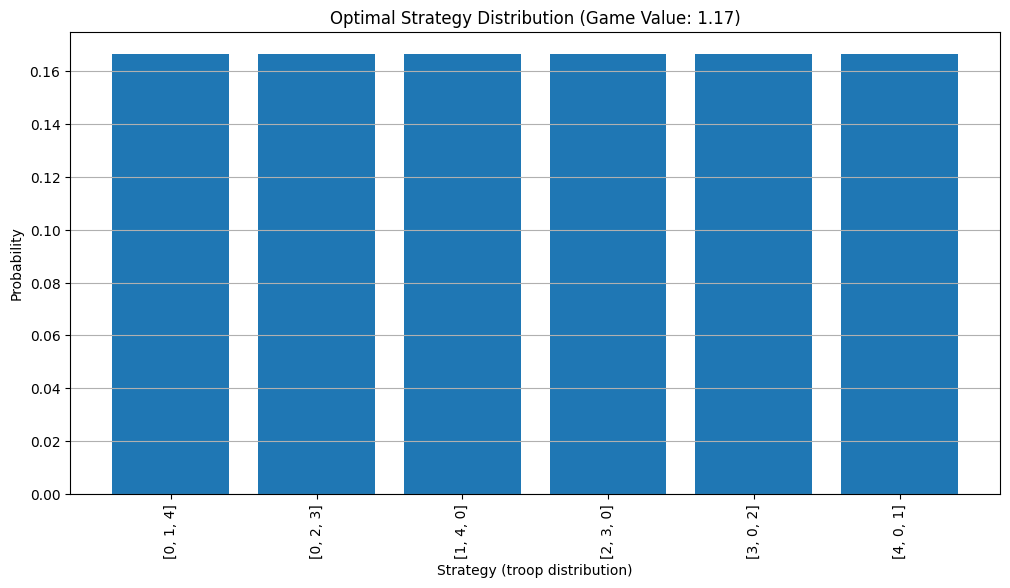

In [13]:
# Plot
strategies = []
probabilities = []

for var in prob_vars:
    if var.varValue > 1e-5:
        idx = int(var.name.split('_')[1])
        strategies.append(str(my_strategies[idx]))
        probabilities.append(var.varValue)

plt.figure(figsize=(12,6))
plt.bar(strategies, probabilities)
plt.xticks(rotation=90)
plt.ylabel('Probability')
plt.xlabel('Strategy (troop distribution)')
plt.title(f'Optimal Strategy Distribution (Game Value: {v.varValue:.2f})')
plt.grid(axis='y')
plt.show()